In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('dinofunworld-2.db')
cursor = conn.cursor()

cursor.execute("SELECT visitorID, sequence FROM sequences where visitorID IN (165316, 1835254, 296394, 404385, 448990);")
sequences = cursor.fetchall()
sequence_stats = pd.DataFrame.from_records(sequences, columns=['visitor', 'sequence'])
sequence_stats['sequence_list'] = sequence_stats['sequence'].apply(lambda s: s.split("-"))
outer_dict = {}
for i in range(5):
    for j in range(i+1, 5):
        dist = sum(int(v1) != int(v2) for v1, v2 in zip(sequence_stats['sequence_list'][i], sequence_stats['sequence_list'][j]))
        id_i = sequence_stats['visitor'][i]
        id_j = sequence_stats['visitor'][j]
        innerDict_i = outer_dict.get(id_i, {})
        innerDict_i[id_j] = dist
        outer_dict[id_i] = innerDict_i
        innerDict_j = outer_dict.get(id_j, {})
        innerDict_j[id_i] = dist
        outer_dict[id_j] = innerDict_j
print(outer_dict)

{165316: {296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}}


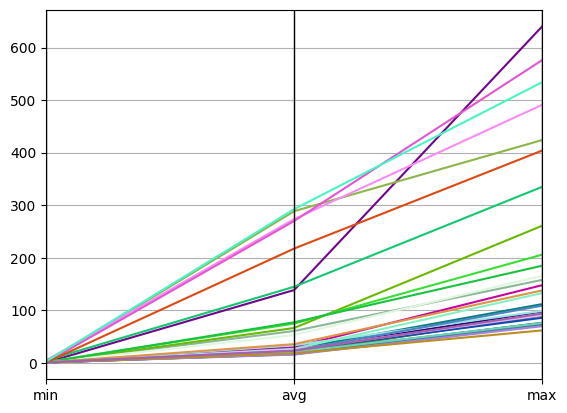

                         ride  min         avg  max
0      Wrightiraptor Mountain    1   60.889780  158
1          Galactosaurus Rage    1   66.577551  261
2          Auvilotops Express    1  138.728745  640
3                  TerrorSaur    2  288.690909  424
4           Wendisaurus Chase    5  273.585366  491
5        Keimosaurus Big Spin    2   74.935354  206
6                    Firefall    1  270.036145  576
7                   Atmosfear    5  144.986056  335
8                  North Line    1   53.196721  166
9             Jeredactyl Jump    1   26.783262  112
10            Sauroma Bumpers    1   30.146930  148
11       Flying TyrAndrienkos    1   24.585313   98
12       Cyndisaurus Asteroid    1   16.873303   72
13                 Beelzebufo    1   18.239726   93
14       Enchanted Toadstools    1   16.357616   77
15                Stegocycles    1   17.145740   76
16             Blue Iguanodon    1   17.110360   73
17         Wild Jungle Cruise    1   19.439909   90
18          

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn = sqlite3.connect('dinofunworld-2.db')
cursor = conn.cursor()

cursor.execute("SELECT AttractionID, Name FROM attraction where LOWER(Category) LIKE '%ride%';")
attraction_name_category_list = cursor.fetchall()
attractions = pd.DataFrame.from_records(attraction_name_category_list, columns=['attractionID', 'attractionName'])
cursor.execute("SELECT visitorID, sequence FROM sequences;")
sequences = cursor.fetchall()
sequence_stats = pd.DataFrame.from_records(sequences, columns=['visitor', 'sequence'])
sequence_stats['sequence_list'] = sequence_stats['sequence'].apply(lambda s: s.split("-"))
outer_dict = {}
new_col_name = "attendance"
for i in range(len(attraction_name_category_list)):
    sequence_stats[new_col_name] = sequence_stats['sequence_list'] \
    .apply(lambda s: [1 if int(x) == int(attraction_name_category_list[i][0]) else 0 for x in s])
    attendance = np.sum(sequence_stats[new_col_name].values.tolist(), axis=0)
    attendance = attendance[np.nonzero(attendance)]
    min_attendance = np.min(attendance)
    avg_attendance = np.mean(attendance)
    max_attendance = np.max(attendance)
    inner_dict_q2 = {"min": min_attendance, "avg": avg_attendance, "max": max_attendance}
    outer_dict[attraction_name_category_list[i][1]] = inner_dict_q2
output_frame = pd.DataFrame.from_dict(outer_dict, orient='index')
output_frame = output_frame.reset_index()
output_frame.columns = ['ride' if x=='index' else x for x in output_frame.columns]
pd.plotting.parallel_coordinates(output_frame, 'ride')
plt.gca().legend_.remove()
plt.show()
print(output_frame)

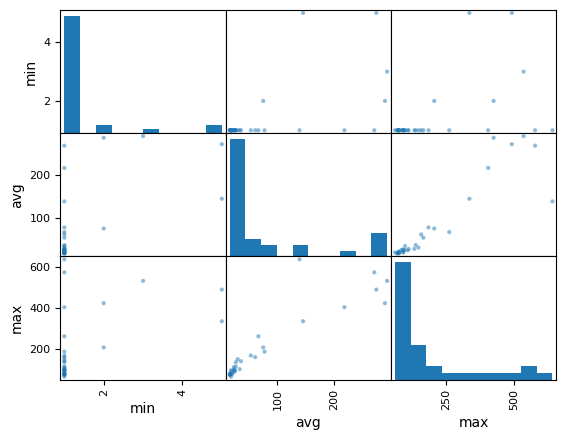

                         ride  min         avg  max
0      Wrightiraptor Mountain    1   60.889780  158
1          Galactosaurus Rage    1   66.577551  261
2          Auvilotops Express    1  138.728745  640
3                  TerrorSaur    2  288.690909  424
4           Wendisaurus Chase    5  273.585366  491
5        Keimosaurus Big Spin    2   74.935354  206
6                    Firefall    1  270.036145  576
7                   Atmosfear    5  144.986056  335
8                  North Line    1   53.196721  166
9             Jeredactyl Jump    1   26.783262  112
10            Sauroma Bumpers    1   30.146930  148
11       Flying TyrAndrienkos    1   24.585313   98
12       Cyndisaurus Asteroid    1   16.873303   72
13                 Beelzebufo    1   18.239726   93
14       Enchanted Toadstools    1   16.357616   77
15                Stegocycles    1   17.145740   76
16             Blue Iguanodon    1   17.110360   73
17         Wild Jungle Cruise    1   19.439909   90
18          

In [6]:
pd.plotting.scatter_matrix(output_frame)
plt.show()
print(output_frame)